In [4]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

import pandas as pd

'0.5.2'

In [5]:
from konlpy.corpus import kolaw
kolaw.fileids()

c = kolaw.open('constitution.txt').read()
print(c[:40])


from konlpy.corpus import kobill
kobill.fileids()

d = kobill.open('1809890.txt').read()
print(d[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로
지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [6]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

JVMNotFoundException: No JVM shared library file (libjli.dylib) found. Try setting up the JAVA_HOME environment variable properly.

In [5]:
sample = c[:40]

#명사 추출
print(hannanum.nouns(sample))
print(kkma.nouns(sample))
print(okt.nouns(sample)) 

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']
['대한', '대한민국', '대한민국헌법', '민국', '헌법', '유구', '역사', '전통', '우리', '국민', '3', '1', '1운동', '운동']
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']


In [6]:
#형태소 추출
print(hannanum.morphs(sample))
print(kkma.morphs(sample))
print(okt.morphs(sample))

['대한민국헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛', '나는', '우리', '대한국민', '은', '3·1운동', '으로']
['대한민국', '헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛나', '는', '우리', '대하', 'ㄴ', '국민', '은', '3', '·', '1', '운동', '으로']
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로']


In [7]:
#pos
print(hannanum.pos(sample))
print(kkma.pos(sample))
print(okt.pos(sample))

[('대한민국헌법', 'N'), ('유구', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('역사', 'N'), ('와', 'J'), ('전통', 'N'), ('에', 'J'), ('빛', 'N'), ('나는', 'J'), ('우리', 'N'), ('대한국민', 'N'), ('은', 'J'), ('3·1운동', 'N'), ('으로', 'J')]
[('대한민국', 'NNG'), ('헌법', 'NNG'), ('유구', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKM'), ('빛나', 'VV'), ('는', 'ETD'), ('우리', 'NNM'), ('대하', 'VV'), ('ㄴ', 'ETD'), ('국민', 'NNG'), ('은', 'JX'), ('3', 'NR'), ('·', 'SP'), ('1', 'NR'), ('운동', 'NNG'), ('으로', 'JKM')]
[('대한민국', 'Noun'), ('헌법', 'Noun'), ('\n\n', 'Foreign'), ('유구', 'Noun'), ('한', 'Josa'), ('역사', 'Noun'), ('와', 'Josa'), ('전통', 'Noun'), ('에', 'Josa'), ('빛나는', 'Verb'), ('우리', 'Noun'), ('대', 'Modifier'), ('한', 'Modifier'), ('국민', 'Noun'), ('은', 'Josa'), ('3', 'Number'), ('·', 'Punctuation'), ('1', 'Number'), ('운동', 'Noun'), ('으로', 'Josa')]


In [12]:
#pos tagset
print(hannanum.tagset)
print(kkma.tagset)
print(okt.tagset)


tagsets = pd.DataFrame()
N = 67
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))
tagsets

{'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언', 'JC': '격조사', 'JP': '서술격 조사', 'JX': '보조사', 'M': '수식언', 'MA': '부사', 'MM': '관형사', 'N': '체언', 'NB': '의존명사', 'NC': '보통명사', 'NN': '수사', 'NP': '대명사', 'NQ': '고유명사', 'P': '용언', 'PA': '형용사', 'PV': '동사', 'PX': '보조 용언', 'S': '기호', 'X': '접사', 'XP': '접두사', 'XS': '접미사'}
{'EC': '연결 어미', 'ECD': '의존적 연결 어미', 'ECE': '대등 연결 어미', 'ECS': '보조적 연결 어미', 'EF': '종결 어미', 'EFA': '청유형 종결 어미', 'EFI': '감탄형 종결 어미', 'EFN': '평서형 종결 어미', 'EFO': '명령형 종결 어미', 'EFQ': '의문형 종결 어미', 'EFR': '존칭형 종결 어미', 'EP': '선어말 어미', 'EPH': '존칭 선어말 어미', 'EPP': '공손 선어말 어미', 'EPT': '시제 선어말 어미', 'ET': '전성 어미', 'ETD': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JK': '조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKI': '호격 조사', 'JKM': '부사격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JX': '보조사', 'MA': '부사', 'MAC': '접속 부사', 'MAG': '일반 부사', 'MD': '관형사', 'MDN': '수 관형사', 'MDT': '일반 관형사', 'NN': '명사', 'NNB': '일반 

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,Determiner,관형사
...,...,...,...,...,...,...
62,*,*,XPV,용언 접두사,*,*
63,*,*,XR,어근,*,*
64,*,*,XSA,형용사 파생 접미사,*,*
65,*,*,XSN,명사파생 접미사,*,*


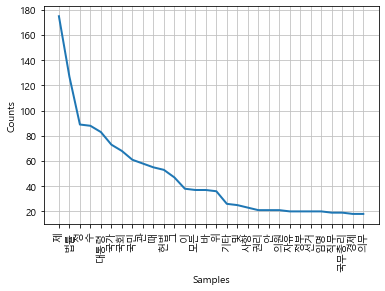

In [25]:
from nltk import Text
from matplotlib import pyplot as plt

from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

kolaw = Text(okt.nouns(c), name="kolaw")
kolaw.plot(30)
plt.show()

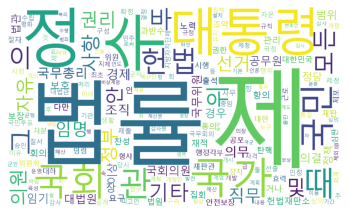

In [35]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정


wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

In [37]:
kolaw.vocab()

FreqDist({'제': 175, '법률': 127, '정': 89, '수': 88, '대통령': 83, '국가': 73, '국회': 68, '국민': 61, '관': 58, '때': 55, ...})

In [30]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정


wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kkma.nouns(sample)))
plt.axis("off")
plt.show()

AttributeError: 'list' object has no attribute 'items'